# Boxplot ML performance

In [ ]:
import pandas as pd
from pathlib import Path
import seaborn as sbn
import matplotlib.pyplot as plt

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30
plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

project_root = Path().resolve().parents[1]

results_dir = project_root / "output" / "ML"

metric_to_plot = "AUC"

## Data loading

In [14]:
results_random5 = pd.read_csv(
    results_dir
    / "results_pooled_data_10bins_random_20_repetitions_random_Q_5_sites.csv", index_col=0
)
results_random5 = results_random5[results_random5["Model"] == "Pooled data Test"]

results_random5

,Fold,Model,Balanced ACC,AUC,F1,Recall,QC_Sampling,Site,Repeated
0,0,Pooled data Test,0.640523,0.730745,0.625850,0.601307,random_Q,1000Brains,0
2,1,Pooled data Test,0.702614,0.791661,0.697674,0.686275,random_Q,1000Brains,0
4,2,Pooled data Test,0.669935,0.712888,0.673139,0.679739,random_Q,1000Brains,0
6,3,Pooled data Test,0.744109,0.837762,0.756250,0.790850,random_Q,1000Brains,0
8,4,Pooled data Test,0.665506,0.743206,0.657718,0.644737,random_Q,1000Brains,0
...,...,...,...,...,...,...,...,...,...
990,20,Pooled data Test,0.656863,0.725747,0.620939,0.562092,random_Q,1000Brains,19
992,21,Pooled data Test,0.689542,0.769063,0.694534,0.705882,random_Q,1000Brains,19
994,22,Pooled data Test,0.683007,0.750822,0.690096,0.705882,random_Q,1000Brains,19
996,23,Pooled data Test,0.662066,0.729532,0.685015,0.732026,random_Q,1000Brains,19


In [ ]:
# Load data random pooled AOMIC 1000brain
results_random5 = pd.read_csv(
    results_dir
    / "results_pooled_data_10bins_random_20_repetitions_random_Q_5_sites.csv"
)
results_random5["QC_Sampling"] = "random_Q"
results_random5["Site"] = "Pooled"
results_random5 = results_random5[results_random5["Model"] == "Pooled data Test"]
results_random5.drop(columns=["Repeated"], inplace=True)


# Load data pooled CAMCAN SALD eNKi
results_random = pd.read_csv(
    results_dir
    / "results_10_bins_random_20_repetitions_unconf_pooled_data_site_SALD_eNKI_CamCAN_all_sampling_Q.csv", index_col=0
)
results_random.drop(columns=["Repeated"])
results_random["QC_Sampling"] = "random_Q"
results_random["Site"] = "Pooled"
results_random = results_random[results_random["Model"] == "Pooled data Test"]

results_random_pooled = pd.concat([results_random5, results_random])

# %%
results_pooled = pd.read_csv(
    results_dir / "results_pooled_data_10_bins_high_low_sampling_Q_5_sites.csv"
)
results_pooled = results_pooled[results_pooled["Model"] == "Pooled data Test"]
results_pooled["Site"] = "Pooled"


# %%

# Load data single site
results_single_site = pd.read_csv(
    results_dir
    / "results_unconfound_10bins_single_site_SALD_eNKI_CamCAN_high_low_sampling_Q.csv"
)
results_single_site = results_single_site[results_single_site["Model"] == "None Test"]
results_single_site.drop(columns=["Model"], inplace=True)
# %%
results_single_site5 = pd.read_csv(
    results_dir / "results_10_bins_single_site_high_low_sampling_Q_AOMIC_1000brains.csv"
)
results_single_site5 = results_single_site5[
    results_single_site5["Model"] == "Single site Test"
]
results_single_site5.drop(columns=["Model"], inplace=True)

results_single = pd.concat([results_single_site, results_single_site5])
# %%

In [5]:
results_random = pd.read_csv(
    results_dir
    / "results_single_site_10_bins_random_20_repetitions_unconf_data_site_SALD_eNKI_CamCAN_high_low_sampling_Q.csv"
)
results_random.drop(columns=["Repeated"])
results_random = results_random[results_random["Model"] == "Pooled data Test"]
results_random["QC_Sampling"] = "random_Q"
results_random.drop(columns=["Model"])


results_single_random5 = pd.read_csv(
    
     results_dir
    / "results_single_site_10bins_random_20repetitions_random_Q_AOMICID1000_10000brains.csv"
)  # noqa
results_single_random5 = results_single_random5[
    results_single_random5["Model"] == "Single site Test"
]
results_single_random5.drop(columns=["Model"], inplace=True)


results_single_random5.drop(columns=["Repeated"])
results_single_random5["QC_Sampling"] = "random_Q"

results_single_random = pd.concat([results_random, results_single_random5])
# %%
site_list = ["1000Brains", "SALD", "eNKI", "CamCAN", "AOMIC_ID1000", "Pooled"]

results_test = pd.concat(
    [results_single_random, results_single, results_pooled, results_random_pooled]
)
results_test["QC_Sampling"].replace(
    {
        "low_Q": "Low Quaility",
        "high_Q": "High Quaility",
        "random_Q": "Random Quaility",
    },
    inplace=True,
)
results_test.rename(columns={"QC_Sampling": "Q Sampling"}, inplace=True)

/tmp/ipykernel_23642/1304134865.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  results_test["QC_Sampling"].replace(


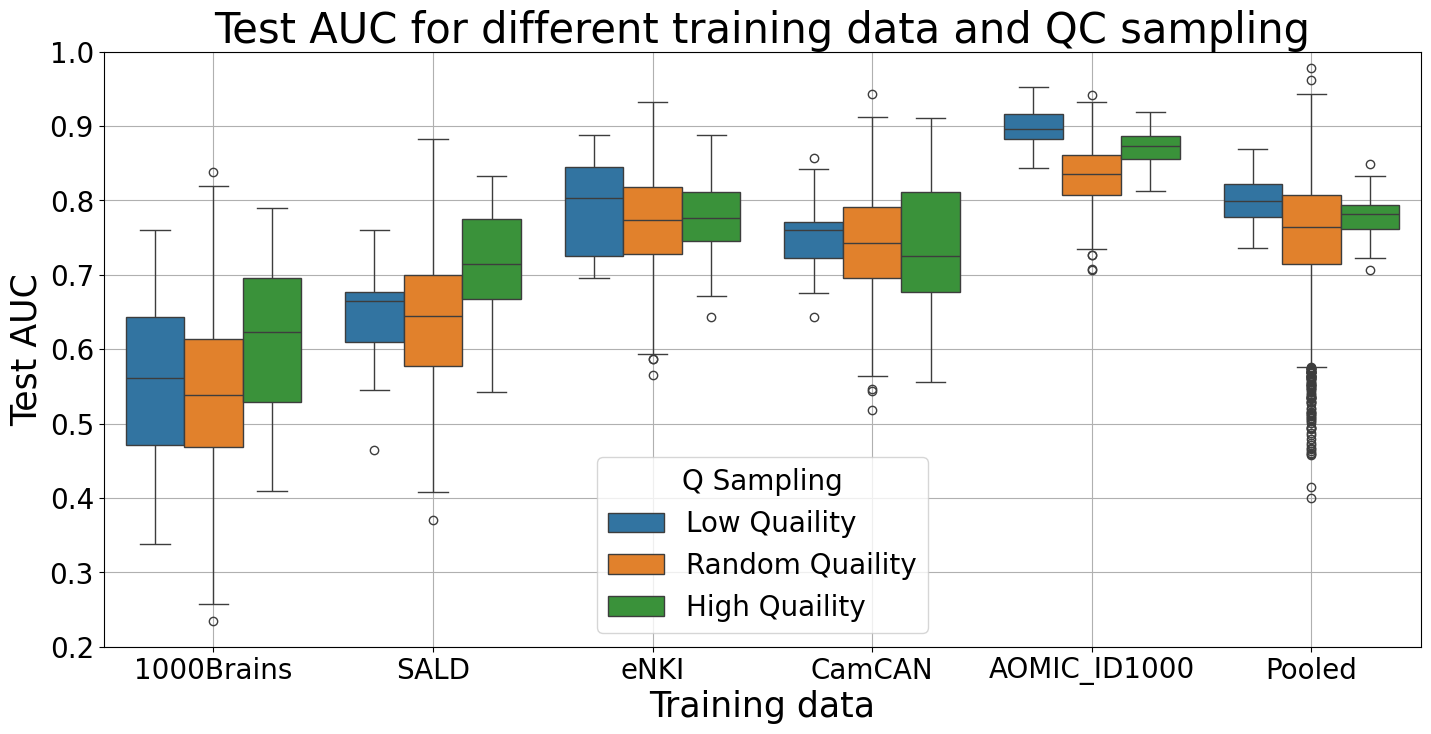

In [9]:
order = ["Low Quaility", "Random Quaility", "High Quaility"]
plt.figure(figsize=(17, 17))
plt.subplot(2, 1, 1)

sbn.boxplot(
    data=results_test,
    x="Site",
    order=site_list,
    y=metric_to_plot,
    hue="Q Sampling",
    hue_order=order,
)
plt.grid()
plt.ylim([0.2, 1])
plt.xlabel("Training data")
plt.ylabel("Test AUC")
plt.title("Test AUC for different training data and QC sampling")
plt.show()